###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2018 D. Koehn, notebook style sheet by L.A. Barba, N.C. Clementi

###### Translated by Huizhe Di @ SCSIO

# 网格生成通过超限插值应用到 sea dike 问题

在上一课中，我们使用超限插值(TFI)实现并测试了我们的网格生成方法。现在，我们把它应用到强烈地形变化的sea dike问题上。

## 重新审阅 sea dike 问题

为了生成包含sea dike的强烈地形变化的四边形网格，只需用参数化曲线描述地形。我们可以用下面的方程式粗略地描述它:

* $x = 0\; m - 4\; m\; \rightarrow\; z(x) = 0\; m$
* $x = 4\; m - 18.5\; m\; \rightarrow\; z(x) = \frac{6.76}{14.5}(x-4)\; m$
* $x = 18.5\; m - 22.5\; m\; \rightarrow\; z(x) = 6.76\; m$
* $x = 22.5\; m - 44.17\; m\; \rightarrow\; z(x) = -\frac{3.82}{21.67}(x-22.5)\; m$

这可能是有点粗略的近似，因为数据采集的照片显示堤坝倾斜和水平表面之间的平滑过渡。尽管如此，让我们试着为这个地形模型生成一个网格。

In [1]:
# Import Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Here, I introduce a new library, which is useful 
# to define the fonts and size of a figure in a notebook
from pylab import rcParams

# Get rid of a Matplotlib deprecation warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Define number of grid points in x-direction and spatial vectors
NXtopo = 100
x_dike = np.linspace(0.0, 61.465, num=NXtopo)
z_dike = np.zeros(NXtopo)

# calculate dike topograpy
def dike_topo(x_dike, z_dike, NX1):
    
    for i in range(NX1):

        if(x_dike[i]<4.0):
            z_dike[i] = 0.0
        
        if(x_dike[i]>=4.0 and x_dike[i]<18.5):
            z_dike[i] = (x_dike[i]-4) * 6.76/14.5
        
        if(x_dike[i]>=18.5 and x_dike[i]<22.5):
            z_dike[i] = 6.76
    
        if(x_dike[i]>=22.5 and x_dike[i]<x_dike[-1]):
            z_dike[i] = -(x_dike[i]-22.5) * 3.82/21.67 + 6.76
            
    return x_dike, z_dike

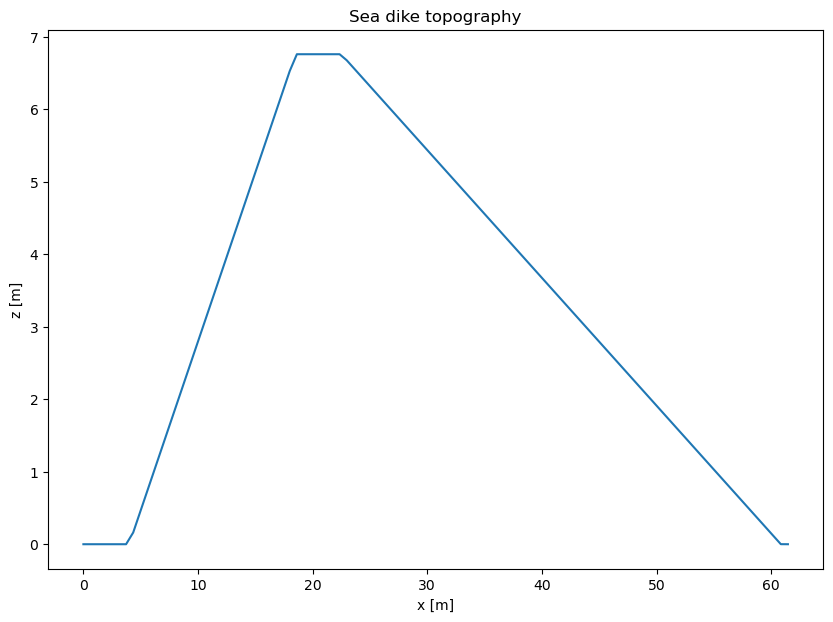

In [6]:
# Define figure size
rcParams['figure.figsize'] = 10, 7

# Plot sea dike topography
dike_topo(x_dike,z_dike,NXtopo)
plt.plot(x_dike,z_dike)
plt.title("Sea dike topography" )
plt.xlabel("x [m]")
plt.ylabel("z [m]")
# plt.axes().set_aspect('equal')
plt.show()

In [7]:
x_dike

array([ 0.        ,  0.62085859,  1.24171717,  1.86257576,  2.48343434,
        3.10429293,  3.72515152,  4.3460101 ,  4.96686869,  5.58772727,
        6.20858586,  6.82944444,  7.45030303,  8.07116162,  8.6920202 ,
        9.31287879,  9.93373737, 10.55459596, 11.17545455, 11.79631313,
       12.41717172, 13.0380303 , 13.65888889, 14.27974747, 14.90060606,
       15.52146465, 16.14232323, 16.76318182, 17.3840404 , 18.00489899,
       18.62575758, 19.24661616, 19.86747475, 20.48833333, 21.10919192,
       21.73005051, 22.35090909, 22.97176768, 23.59262626, 24.21348485,
       24.83434343, 25.45520202, 26.07606061, 26.69691919, 27.31777778,
       27.93863636, 28.55949495, 29.18035354, 29.80121212, 30.42207071,
       31.04292929, 31.66378788, 32.28464646, 32.90550505, 33.52636364,
       34.14722222, 34.76808081, 35.38893939, 36.00979798, 36.63065657,
       37.25151515, 37.87237374, 38.49323232, 39.11409091, 39.73494949,
       40.35580808, 40.97666667, 41.59752525, 42.21838384, 42.83

In [8]:
z_dike

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.61312295e-01,
       4.50760850e-01, 7.40209404e-01, 1.02965796e+00, 1.31910651e+00,
       1.60855507e+00, 1.89800362e+00, 2.18745218e+00, 2.47690073e+00,
       2.76634929e+00, 3.05579784e+00, 3.34524639e+00, 3.63469495e+00,
       3.92414350e+00, 4.21359206e+00, 4.50304061e+00, 4.79248917e+00,
       5.08193772e+00, 5.37138628e+00, 5.66083483e+00, 5.95028339e+00,
       6.23973194e+00, 6.52918049e+00, 6.76000000e+00, 6.76000000e+00,
       6.76000000e+00, 6.76000000e+00, 6.76000000e+00, 6.76000000e+00,
       6.76000000e+00, 6.67683652e+00, 6.56739122e+00, 6.45794591e+00,
       6.34850060e+00, 6.23905530e+00, 6.12960999e+00, 6.02016468e+00,
       5.91071938e+00, 5.80127407e+00, 5.69182876e+00, 5.58238346e+00,
       5.47293815e+00, 5.36349284e+00, 5.25404754e+00, 5.14460223e+00,
       5.03515692e+00, 4.92571162e+00, 4.81626631e+00, 4.70682100e+00,
      

不幸的是，TFI是在单位方格上定义的，所以在应用TFI之前，我们必须对sea dike地形进行归一化。 

In [9]:
# Normalize sea dike topography
xmax_dike = np.max(x_dike)
zmax_dike = np.max(z_dike)

x_dike_norm = x_dike / xmax_dike
z_dike_norm = z_dike / zmax_dike + 1

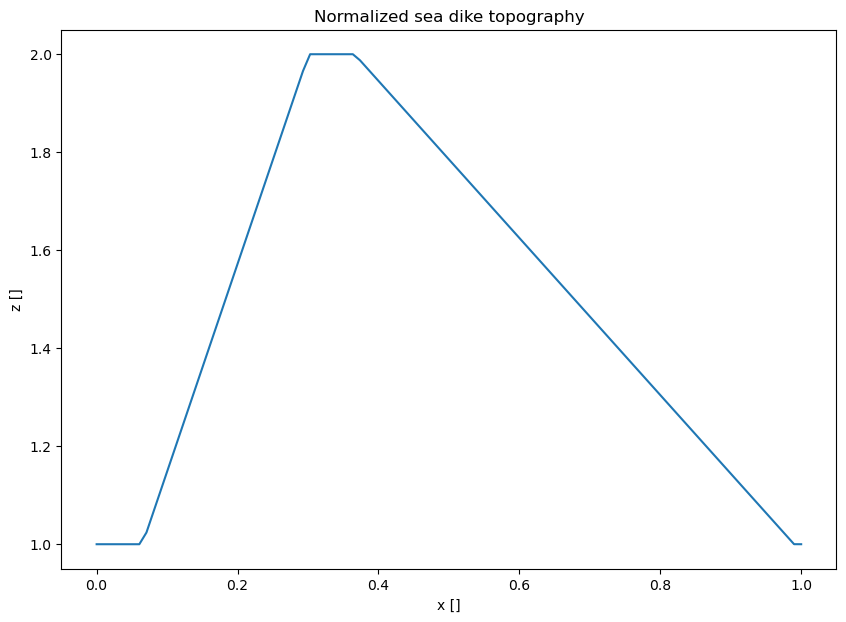

In [12]:
# Plot normalized sea dike topography
plt.plot(x_dike_norm,z_dike_norm)
plt.title("Normalized sea dike topography" )
plt.xlabel("x []")
plt.ylabel("z []")
# plt.axes().set_aspect('equal')
plt.show()

In [14]:
z_dike_norm

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.02386277, 1.0666806 , 1.10949843,
       1.15231627, 1.1951341 , 1.23795193, 1.28076977, 1.3235876 ,
       1.36640543, 1.40922327, 1.4520411 , 1.49485893, 1.53767677,
       1.5804946 , 1.62331243, 1.66613027, 1.7089481 , 1.75176594,
       1.79458377, 1.8374016 , 1.88021944, 1.92303727, 1.9658551 ,
       2.        , 2.        , 2.        , 2.        , 2.        ,
       2.        , 2.        , 1.98769771, 1.97150758, 1.95531744,
       1.93912731, 1.92293717, 1.90674704, 1.89055691, 1.87436677,
       1.85817664, 1.8419865 , 1.82579637, 1.80960624, 1.7934161 ,
       1.77722597, 1.76103583, 1.7448457 , 1.72865556, 1.71246543,
       1.6962753 , 1.68008516, 1.66389503, 1.64770489, 1.63151476,
       1.61532463, 1.59913449, 1.58294436, 1.56675422, 1.55056409,
       1.53437395, 1.51818382, 1.50199369, 1.48580355, 1.46961342,
       1.45342328, 1.43723315, 1.42104302, 1.40485288, 1.38866

好了，现在我们有了一个单位方格上的归一化dike地形，所以我们可以定义地形的参数曲线。

In [15]:
# Define parameters for deformed Cartesian mesh
NX = 80
NZ = 20

In [16]:
# Define parametric curves at model boundaries ...
# ... bottom boundary
def Xb(s):
    
    x = s
    z = 0.0

    xzb = [x,z]
    
    return xzb

# ... top boundary
def Xt(s):
    
    x = s
    
    # normalized x-coordinate s -> unnormalized x-coordinate x_d
    x_d = xmax_dike * s
    z_d = 0.0
    
    if(x_d<4.0):
        z_d = 0.0
        
    if(x_d>=4.0 and x_d<18.5):
        z_d = (x_d-4) * 6.76/14.5
        
    if(x_d>=18.5 and x_d<22.5):
        z_d = 6.76
    
    if(x_d>=22.5 and x_d<xmax_dike):
        z_d = -(x_d-22.5) * 3.82/21.67 + 6.76
    
    # unnormalized z-coordinate z_d -> normalized z-coordinate z
    z = z_d / zmax_dike + 1

    xzt = [x,z]
    
    return xzt

# ... left boundary
def Xl(s):
    
    x = 0.0
    z = s  

    xzl = [x,z]
    
    return xzl

# ... right boundary
def Xr(s):
    
    x = 1
    z = s
    
    xzr = [x,z]
    
    return xzr

In [17]:
# Transfinite interpolation

# Discretize along xi and eta axis
xi = np.linspace(0.0, 1.0, num=NX)
eta = np.linspace(0.0, 1.0, num=NZ)

xi1, eta1 = np.meshgrid(xi, eta)

# Intialize matrices for x and z axis
X = np.zeros((NX,NZ))
Z = np.zeros((NX,NZ))

# loop over cells
for i in range(NX):
    Xi = xi[i]
    for j in range(NZ):
        Eta = eta[j]
        
        xb = Xb(Xi)
        xb0 = Xb(0)
        xb1 = Xb(1)
        
        xt = Xt(Xi)
        xt0 = Xt(0)
        xt1 = Xt(1)
        
        xl = Xl(Eta)
        xr = Xr(Eta)

        # Transfinite Interpolation (Gordon-Hall algorithm)
        X[i,j] = (1-Eta) * xb[0] + Eta * xt[0] + (1-Xi) * xl[0] + Xi * xr[0] \
               - (Xi * Eta * xt1[0] + Xi * (1-Eta) * xb1[0] + Eta * (1-Xi) * xt0[0] \
               + (1-Xi) * (1-Eta) * xb0[0])
            
        Z[i,j] = (1-Eta) * xb[1] + Eta * xt[1] + (1-Xi) * xl[1] + Xi * xr[1] \
               - (Xi * Eta * xt1[1] + Xi * (1-Eta) * xb1[1] + Eta * (1-Xi) * xt0[1] \
               + (1-Xi) * (1-Eta) * xb0[1])        

到目前为止没有错误。在绘制生成的网格之前，我们必须对空间坐标进行去归一化。

In [18]:
# Unnormalize the mesh 
X = X * xmax_dike
Z = Z * zmax_dike

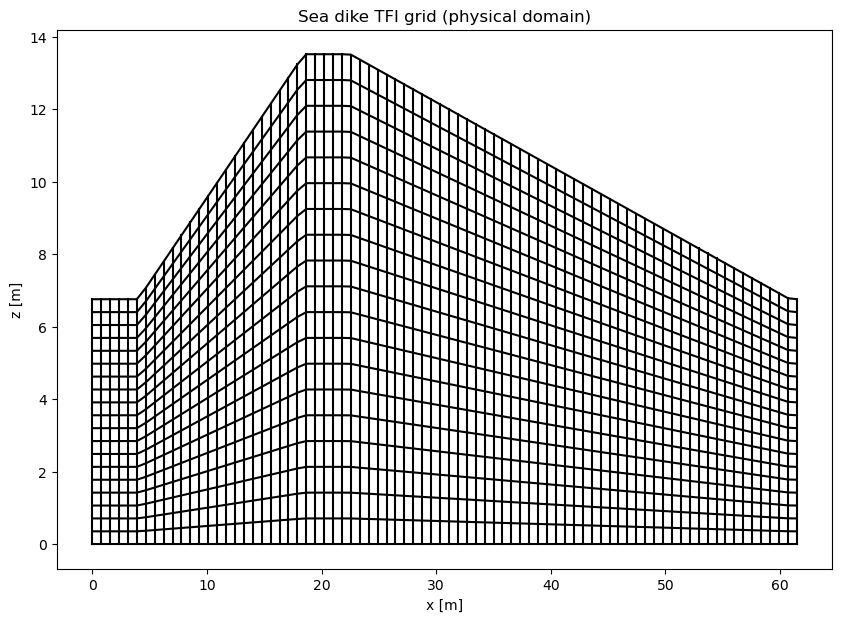

In [20]:
# Plot TFI mesh (physical domain)
plt.plot(X, Z, 'k')
plt.plot(X.T, Z.T, 'k')

plt.title("Sea dike TFI grid (physical domain)" )
plt.xlabel("x [m]")
plt.ylabel("z [m]")
# plt.axes().set_aspect('equal')
# plt.savefig('sea_dike_TFI.pdf', bbox_inches='tight', format='pdf')
plt.show()

最后，针对sea dike问题，我们得到了一个变形的四边形网格，很好地代表了强烈地形的变化。

## 我们学习到:

* 如何用超限插值法生成sea dike地形的变形四边形网格
* 四网格的生成是相当耗时的，即使是简单的几何模型